In [181]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from seaborn import load_dataset
from patsy import dmatrices
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

In [182]:
penguins = load_dataset('penguins')
penguins.head

<bound method NDFrame.head of     species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen            39.1           18.7              181.0   
1    Adelie  Torgersen            39.5           17.4              186.0   
2    Adelie  Torgersen            40.3           18.0              195.0   
3    Adelie  Torgersen             NaN            NaN                NaN   
4    Adelie  Torgersen            36.7           19.3              193.0   
..      ...        ...             ...            ...                ...   
339  Gentoo     Biscoe             NaN            NaN                NaN   
340  Gentoo     Biscoe            46.8           14.3              215.0   
341  Gentoo     Biscoe            50.4           15.7              222.0   
342  Gentoo     Biscoe            45.2           14.8              212.0   
343  Gentoo     Biscoe            49.9           16.1              213.0   

     body_mass_g     sex  
0         3750.0    Male  
1  

In [183]:
penguins.isnull().sum() #Compruebo que no tenga valores null

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [184]:
penguins[penguins.bill_length_mm.isnull()]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


In [185]:
penguins = penguins[penguins.bill_length_mm.notnull()]
penguins.head

<bound method NDFrame.head of     species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen            39.1           18.7              181.0   
1    Adelie  Torgersen            39.5           17.4              186.0   
2    Adelie  Torgersen            40.3           18.0              195.0   
4    Adelie  Torgersen            36.7           19.3              193.0   
5    Adelie  Torgersen            39.3           20.6              190.0   
..      ...        ...             ...            ...                ...   
338  Gentoo     Biscoe            47.2           13.7              214.0   
340  Gentoo     Biscoe            46.8           14.3              215.0   
341  Gentoo     Biscoe            50.4           15.7              222.0   
342  Gentoo     Biscoe            45.2           14.8              212.0   
343  Gentoo     Biscoe            49.9           16.1              213.0   

     body_mass_g     sex  
0         3750.0    Male  
1  

In [186]:
penguins.isnull().sum() #Compruebo que no tenga valores null

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  9
dtype: int64

In [187]:
penguins[penguins.sex.isnull()]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,NaN


In [188]:
penguins = penguins[penguins.sex.notnull()]
penguins.head

<bound method NDFrame.head of     species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen            39.1           18.7              181.0   
1    Adelie  Torgersen            39.5           17.4              186.0   
2    Adelie  Torgersen            40.3           18.0              195.0   
4    Adelie  Torgersen            36.7           19.3              193.0   
5    Adelie  Torgersen            39.3           20.6              190.0   
..      ...        ...             ...            ...                ...   
338  Gentoo     Biscoe            47.2           13.7              214.0   
340  Gentoo     Biscoe            46.8           14.3              215.0   
341  Gentoo     Biscoe            50.4           15.7              222.0   
342  Gentoo     Biscoe            45.2           14.8              212.0   
343  Gentoo     Biscoe            49.9           16.1              213.0   

     body_mass_g     sex  
0         3750.0    Male  
1  

In [189]:
penguins.isnull().sum() #Compruebo que no tenga valores null

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [190]:
#Transformo los valores de 'Male' a 1 y los valores de 'Female' a 0 para que sean numéricos
penguins['sex'] = penguins['sex'].apply(lambda x:1 if x=='Male' else 0)

C:\Users\Alexander Dueñas\AppData\Local\Temp\ipykernel_5308\2509902399.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  penguins['sex'] = penguins['sex'].apply(lambda x:1 if x=='Male' else 0)


In [191]:
penguins.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
count,333.000000,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057,0.504505
std,5.468668,1.969235,14.015765,805.215802,0.500732
min,32.100000,13.100000,172.000000,2700.000000,0.000000
25%,39.500000,15.600000,190.000000,3550.000000,0.000000
50%,44.500000,17.300000,197.000000,4050.000000,1.000000
75%,48.600000,18.700000,213.000000,4775.000000,1.000000
max,59.600000,21.500000,231.000000,6300.000000,1.000000


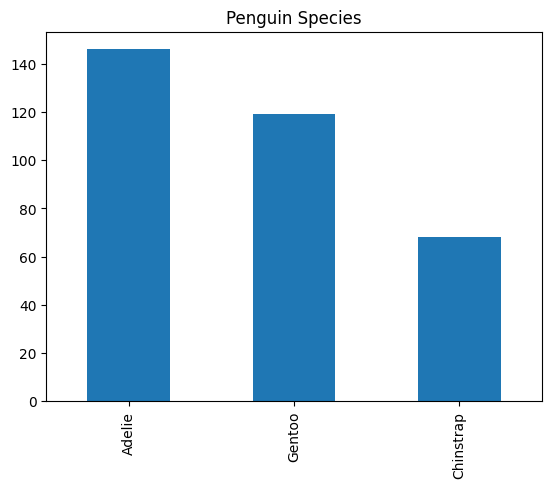

In [192]:
penguins.species.value_counts().plot(
    kind="bar",
    title="Penguin Species"
);

In [193]:
penguins.groupby('species').mean()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
species,,,,,
Adelie,38.823973,18.347260,190.102740,3706.164384,0.500000
Chinstrap,48.833824,18.420588,195.823529,3733.088235,0.500000
Gentoo,47.568067,14.996639,217.235294,5092.436975,0.512605


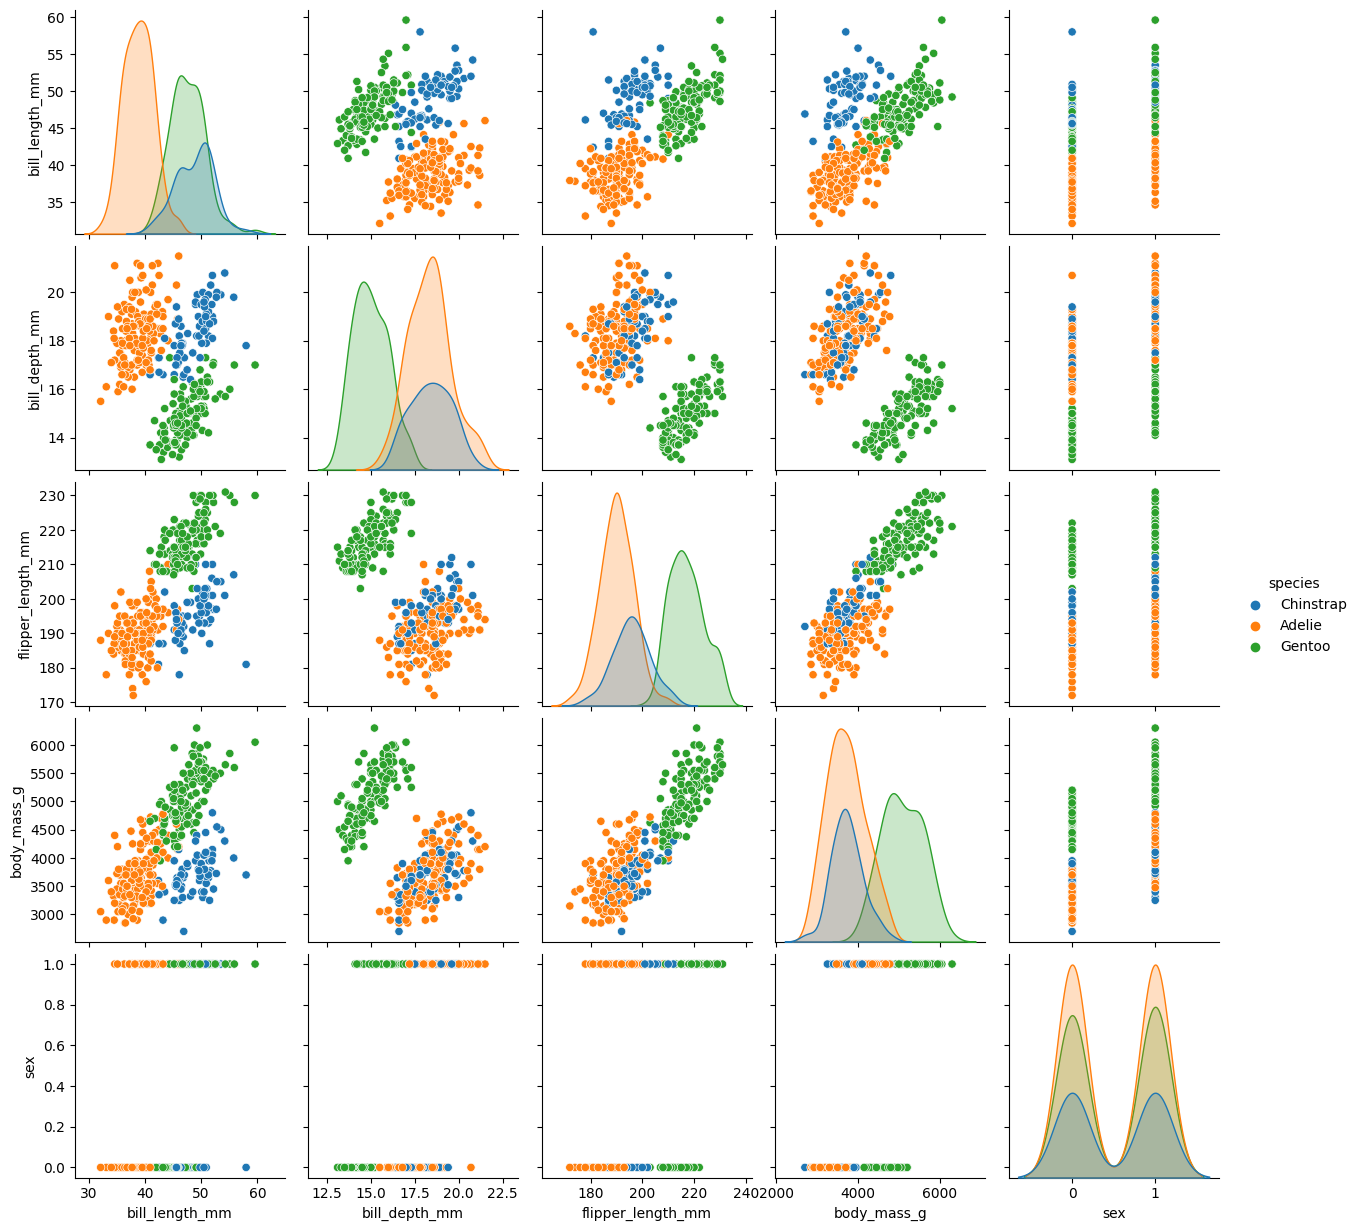

In [194]:
sns.pairplot(
    penguins.sample(333), hue="species"
)

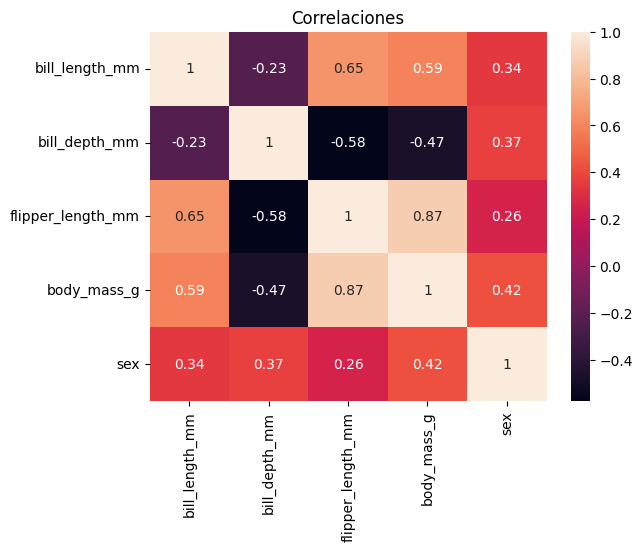

In [195]:
sns.heatmap(penguins.corr(), annot=True)
plt.title('Correlaciones')
plt.show()

In [196]:
penguins.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                    int64
dtype: object

In [197]:
island_cat = pd.get_dummies(penguins['island'])

In [198]:
X = pd.concat([penguins[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex']], island_cat], axis = 1)
X

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,Biscoe,Dream,Torgersen
0,39.1,18.7,181.0,3750.0,1,0,0,1
1,39.5,17.4,186.0,3800.0,0,0,0,1
2,40.3,18.0,195.0,3250.0,0,0,0,1
4,36.7,19.3,193.0,3450.0,0,0,0,1
5,39.3,20.6,190.0,3650.0,1,0,0,1
...,...,...,...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,0,1,0,0
340,46.8,14.3,215.0,4850.0,0,1,0,0
341,50.4,15.7,222.0,5750.0,1,1,0,0
342,45.2,14.8,212.0,5200.0,0,1,0,0


In [199]:
y = penguins['species']
y

0      Adelie
1      Adelie
2      Adelie
4      Adelie
5      Adelie
        ...  
338    Gentoo
340    Gentoo
341    Gentoo
342    Gentoo
343    Gentoo
Name: species, Length: 333, dtype: object

In [200]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

c:\Users\Alexander Dueñas\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy Train (Precisión de entrenamiento):  0.9957081545064378
Accuracy Test (Precisión de prueba):  0.99


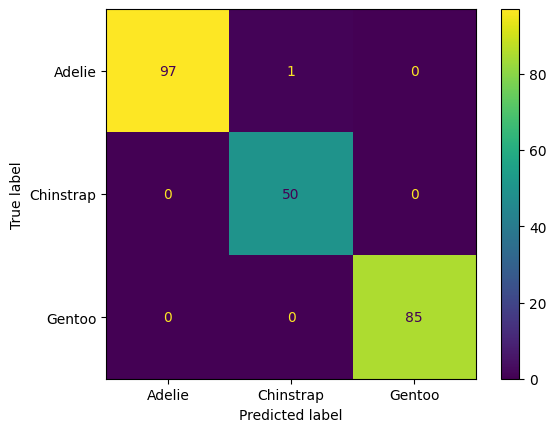

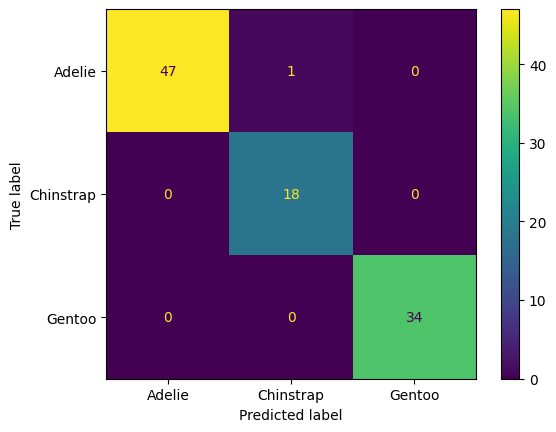

In [202]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_train) #Visualizo la matriz de confusión de entrenamiento
cm = confusion_matrix(y_train, y_pred, labels=log_reg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_reg.classes_)
disp.plot()
accuracy_train_linear_clf = accuracy_score(y_train, y_pred)
print("Accuracy Train (Precisión de entrenamiento): ", accuracy_train_linear_clf)

y_pred = log_reg.predict(X_test) #Visualizo la matriz de confusión de prueba
cm = confusion_matrix(y_test, y_pred, labels=log_reg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_reg.classes_)
disp.plot()
accuracy_test_linear_clf = accuracy_score(y_test, y_pred)
print("Accuracy Test (Precisión de prueba): ", accuracy_test_linear_clf)